# Загрузка и первичный обзор

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Sleep_health_and_lifestyle_dataset (1).csv')

In [196]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [197]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [199]:
df.shape

(374, 13)

In [200]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


# Обработка данных

In [201]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [202]:
df_copy = df.copy()
df_copy['Sleep Disorder'] = df_copy['Sleep Disorder'].fillna('None')
df_copy.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [203]:
dup_count = df_copy.duplicated().sum()
print(dup_count)

0


In [204]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep',
                'Physical Activity Level', 'Stress Level',
                'Heart Rate', 'Daily Steps']

for col in num_col:
    z_scores = np.abs(stats.zscore(df_copy[col]))
    outliers = (z_scores > 3).sum()

    print(f"{col}: {outliers} выбросов")

Age: 0 выбросов
Sleep Duration: 0 выбросов
Quality of Sleep: 0 выбросов
Physical Activity Level: 0 выбросов
Stress Level: 0 выбросов
Heart Rate: 9 выбросов
Daily Steps: 0 выбросов


In [205]:
df_copy.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [206]:
cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in cols:
    print(f'{col} : {df_copy[col].nunique()}')

Gender : 2
Occupation : 11
BMI Category : 4
Sleep Disorder : 3


In [207]:
for col in cols:
  print(df_copy[col].value_counts())
  print()

Gender
Male      189
Female    185
Name: count, dtype: int64

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64



In [208]:
df_copy.select_dtypes(include=[np.number]).corr()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


# Визуализация данных

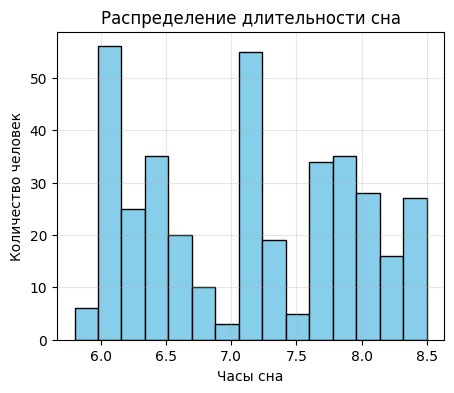

In [209]:
plt.figure(figsize=(5, 4))
plt.hist(df['Sleep Duration'], bins=15, color='skyblue', edgecolor='black')
plt.title('Распределение длительности сна')
plt.xlabel('Часы сна')
plt.ylabel('Количество человек')
plt.grid(True, alpha=0.3)
plt.show()

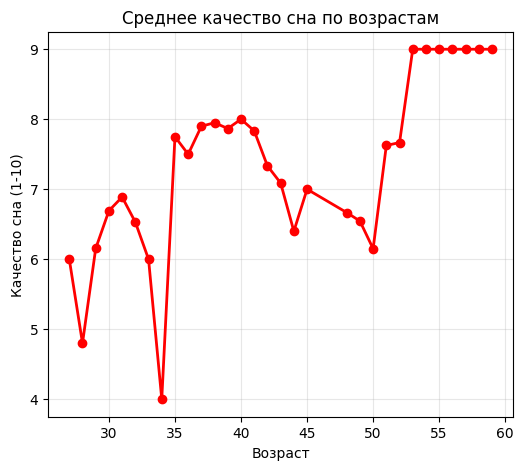

In [210]:
age_quality = df.groupby('Age')['Quality of Sleep'].mean()
plt.figure(figsize=(6, 5))
plt.plot(age_quality.index, age_quality.values, marker='o', color='red', linewidth=2)
plt.title('Среднее качество сна по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Качество сна (1-10)')
plt.grid(True, alpha=0.3)
plt.show()

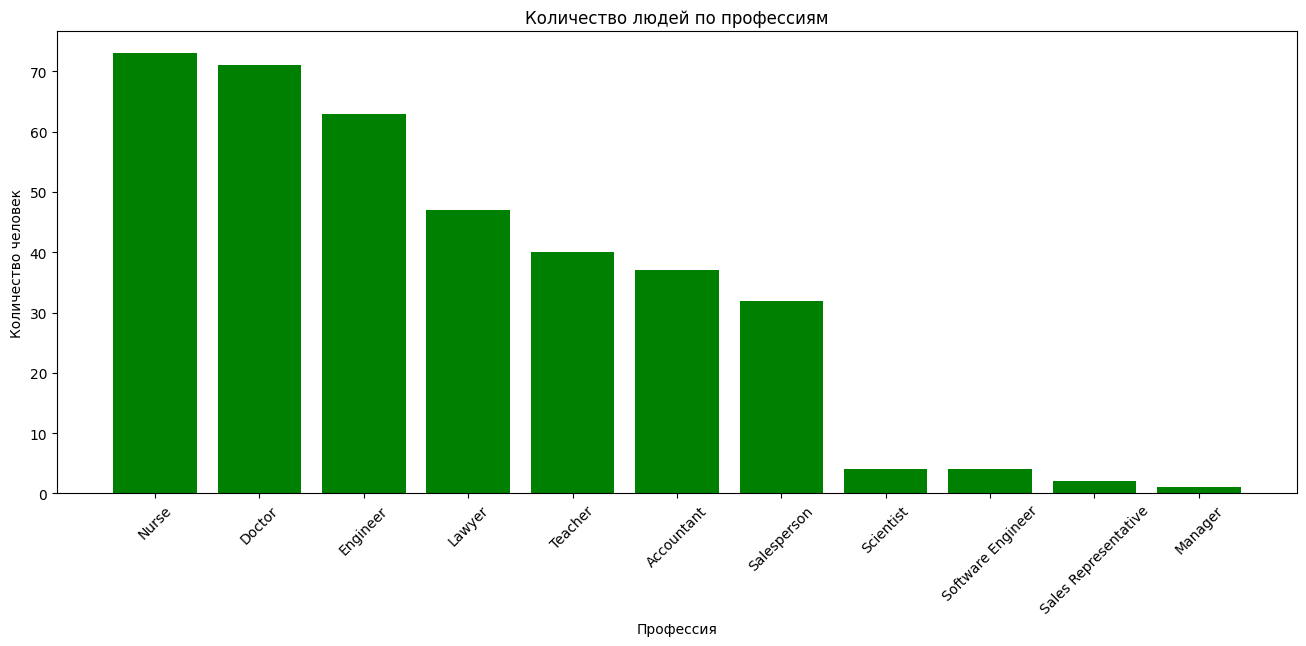

In [211]:
profession_counts = df['Occupation'].value_counts()
plt.figure(figsize=(16, 6))
plt.bar(profession_counts.index, profession_counts.values, color='green')
plt.title('Количество людей по профессиям')
plt.xlabel('Профессия')
plt.ylabel('Количество человек')
plt.xticks(rotation=45)
plt.show()

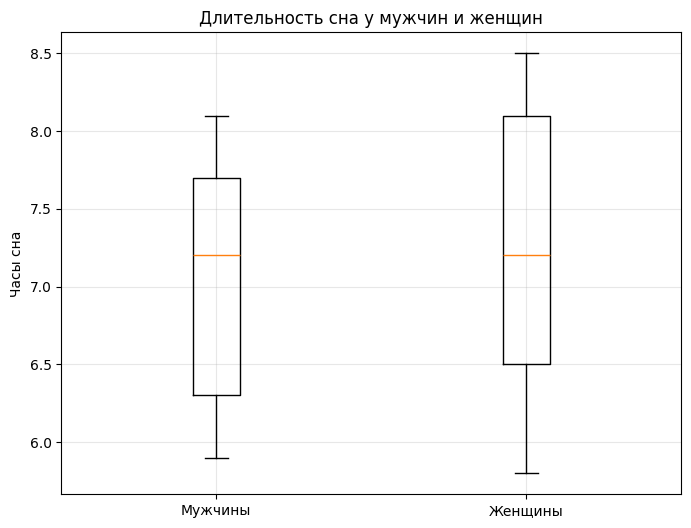

In [212]:
plt.figure(figsize=(8, 6))
men_sleep = df[df['Gender'] == 'Male']['Sleep Duration']
women_sleep = df[df['Gender'] == 'Female']['Sleep Duration']
plt.boxplot([men_sleep, women_sleep], labels=['Мужчины', 'Женщины'])
plt.title('Длительность сна у мужчин и женщин')
plt.ylabel('Часы сна')
plt.grid(True, alpha=0.3)
plt.show()

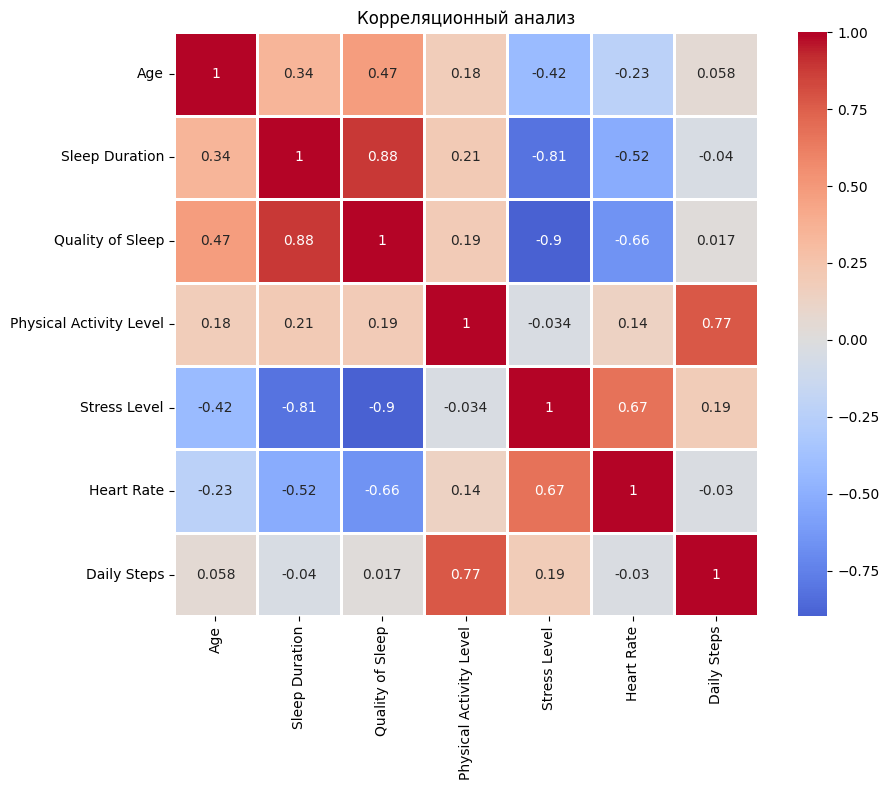

In [213]:
corr = df[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Корреляционный анализ')
plt.tight_layout()
plt.show()

# Группировки и агрегации

In [214]:
gr1 = df_copy.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Heart Rate': 'mean',
    'Person ID': 'count'
}).round(2)

print(gr1)

                      Sleep Duration  Quality of Sleep  Stress Level  \
Occupation                                                             
Accountant                      7.11              7.89          4.59   
Doctor                          6.97              6.65          6.73   
Engineer                        7.99              8.41          3.89   
Lawyer                          7.41              7.89          5.06   
Manager                         6.90              7.00          5.00   
Nurse                           7.06              7.37          5.55   
Sales Representative            5.90              4.00          8.00   
Salesperson                     6.40              6.00          7.00   
Scientist                       6.00              5.00          7.00   
Software Engineer               6.75              6.50          6.00   
Teacher                         6.69              6.98          4.53   

                      Heart Rate  Person ID  
Occupation       

In [215]:
gr2 = df_copy.groupby(['Gender']).agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
}).round(2)

print(gr2)

        Sleep Duration  Quality of Sleep  Stress Level
Gender                                                
Female            7.23              7.66          4.68
Male              7.04              6.97          6.08


In [216]:
gr3 = df_copy.groupby('BMI Category').agg({
    'Sleep Duration': ['mean', 'min', 'max'],
    'Heart Rate': 'mean',
    'Daily Steps': 'mean',
}).round(2)

print(gr3)

              Sleep Duration           Heart Rate Daily Steps
                        mean  min  max       mean        mean
BMI Category                                                 
Normal                  7.39  6.0  8.5      68.73     6887.18
Normal Weight           7.33  6.4  8.2      71.29     6766.67
Obese                   6.96  5.9  8.1      84.30     3350.00
Overweight              6.77  5.8  8.2      70.95     6965.54


In [217]:
pivot_table = pd.pivot_table(df_copy,
                            values='Sleep Duration',
                            index='Occupation',
                            columns='Gender',
                            aggfunc='mean',
                            fill_value=0).round(2)

print(pivot_table)

Gender                Female  Male
Occupation                        
Accountant              7.11  7.20
Doctor                  8.20  6.93
Engineer                8.43  7.54
Lawyer                  7.15  7.42
Manager                 6.90  0.00
Nurse                   7.06  0.00
Sales Representative    0.00  5.90
Salesperson             0.00  6.40
Scientist               6.00  0.00
Software Engineer       0.00  6.75
Teacher                 6.71  6.58


In [218]:
df_copy.to_csv('sleep_health_copy.csv', index=False)